In [3]:
# Setup

library(tidyverse)
ess18 <- read_csv("https://github.com/CALDISS-AAU/workshop_R-intro/raw/master/data/ESS2018DK_subset.csv")

Rows: 1572 Columns: 16

-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr  (6): vote, prtvtddk, lvpntyr, tygrtr, gndr, edlvddk
dbl (10): idno, netustm, ppltrst, yrbrn, eduyrs, wkhct, wkhtot, grspnum, frl...


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.



# Visualization with ggplot2

R (more specifically `ggplot2`) is praised for its visualization capabilities. `ggplot2` allows for a high degree of customization and is incredibly versatile in terms of the kinds of visualization possible.

Cheatsheet: https://raw.githubusercontent.com/rstudio/cheatsheets/master/data-visualization-2.1.pdf

Below is shown how to create a scatterplot with `ggplot2`:

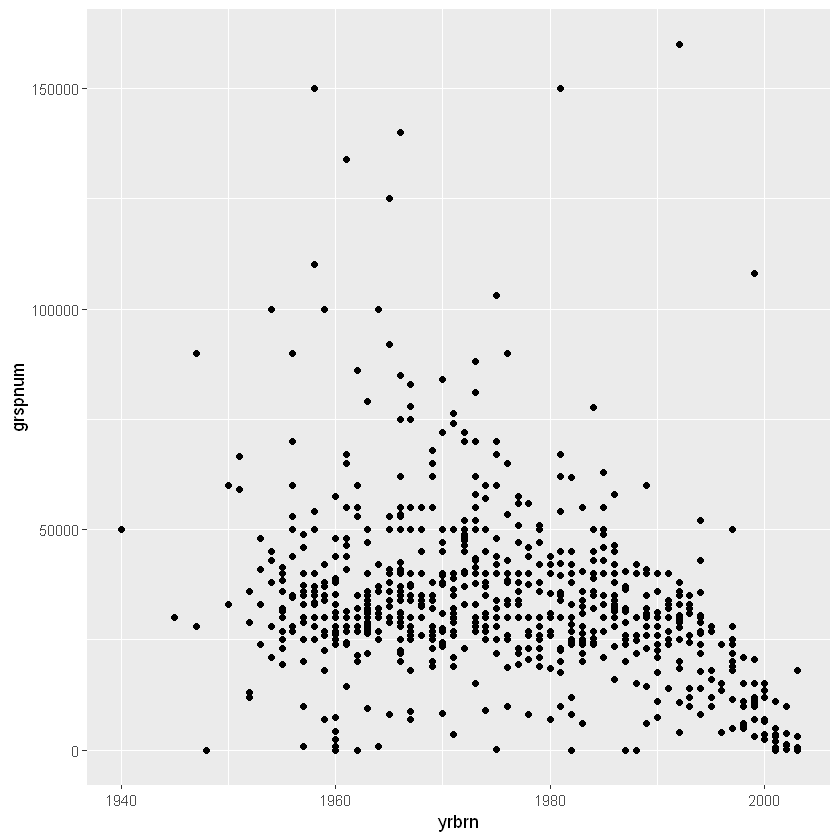

In [7]:
library(ggplot2)

ess18_filt <- ess18 %>%
    filter(grspnum < 200000)

ggplot(data = ess18_filt, aes(x = yrbrn, y = grspnum)) + 
    geom_point()

## Structure of a ggplot

As a rule, a ggplot follows this template:

```
ggplot(data = <DATA>, mapping = aes(<MAPPINGS>)) + 
  <GEOM_FUNCTION>(mapping = aes(<MAPPINGS>))
```

- **ggplot**: Main function. This functino denotes what should be included in the plot. The function `ggplot` does not in itself contain information about the type of plot. This is specified via a geom funkcion.
    - *data*: The primary argument for ggplot is the data to be plotted. A data frame is expected


- **mapping**: Argument. Here the information is the data is "mapped" (aes: "aesthetics") to the plot. The primary mappings are `x` and `y`. Other mappings include `colour`, `fill`, `shape`, `size`. Mappings are always specified as `aes(MAPPINGS)` (fx `aes(x = 'eduyrs', y = 'grspnum')`). Mappings can both be specified as an argument for the main ggplot function or for the specific geom functinon. The difference is in whether the mapping applies to the whole plot or a specific geom layer.


- **GEOM_FUNCTION (fx geom_point)**: The plotting function. A "geom" is the geometric shape use to represent the data points (bars, lines, boxplots, points etc.). It is possible to have several geom function (several layers) in the same plot.
    - *mapping*: All geom functions in ggplot accept a mapping argument. However, not all aesthetics are compatible with all geoms. A histogram does fx not contain a mapping for y.

### Combining information with multiple aesthetics and layers

The grammar of `ggplot2` makes it relatively easy to combine a myriad information into a single plot (below is meant more as an illustrative example): 

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
"Removed 1 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 35 rows containing missing values (geom_point)."


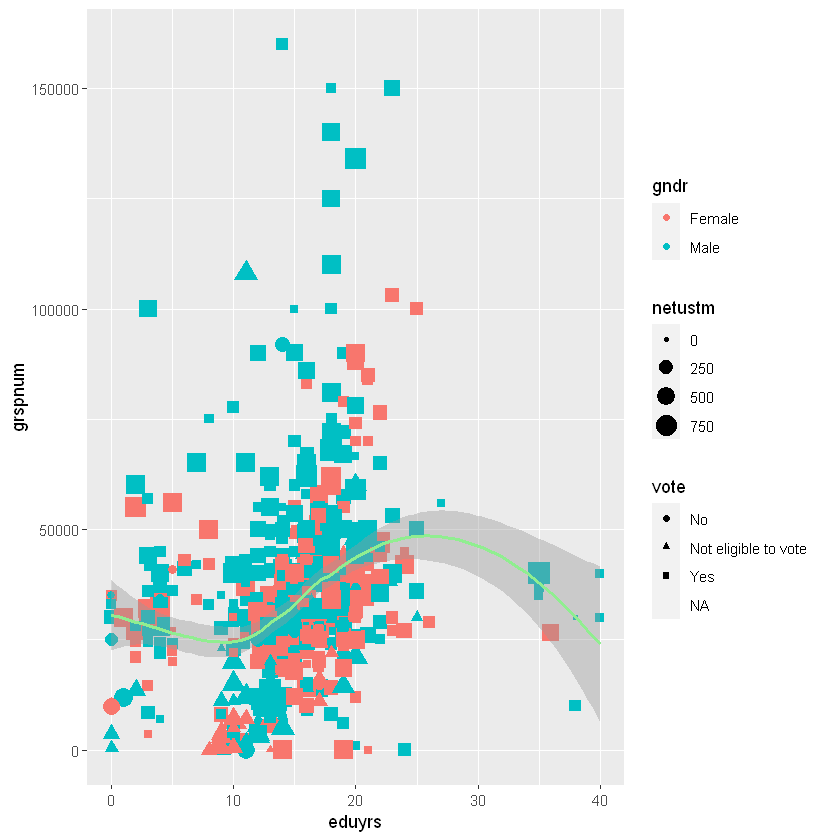

In [6]:
ggplot(data = ess18_filt, mapping = aes(x = eduyrs, y = grspnum)) +
  geom_point(mapping = aes(colour = gndr, shape = vote, size = netustm)) +
  geom_smooth(colour = 'lightgreen')

### Switching out geom

Because the input for the plot is specified before the actual plot (geom) is chosed, it is easy to switch the plot out with something else.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



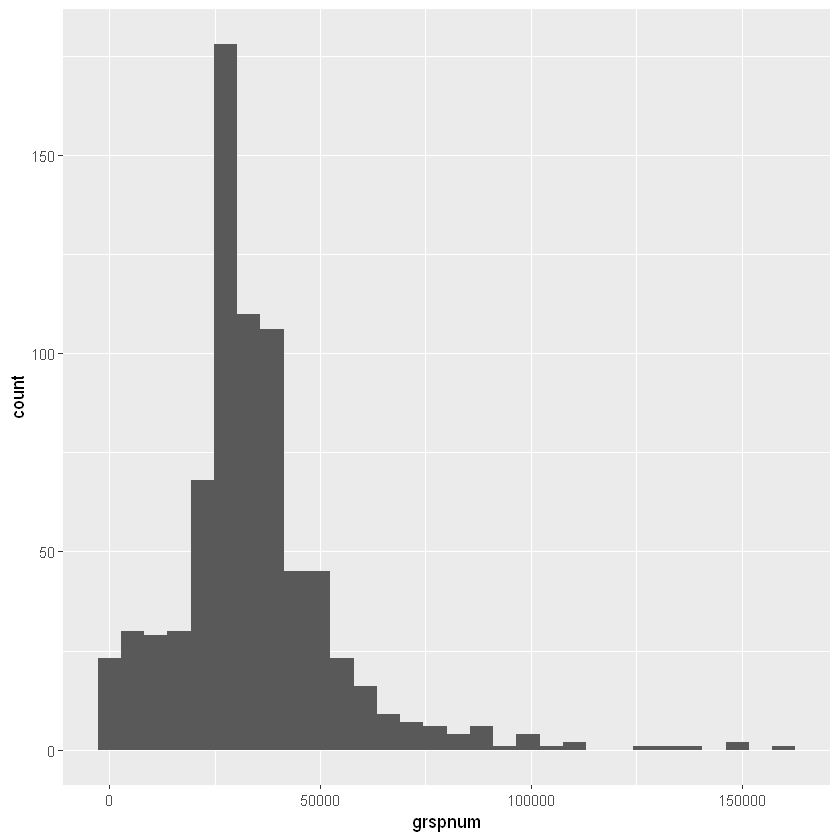

In [9]:
# histogram of monthly income

ggplot(data = ess18_filt, aes(x = grspnum)) + 
    geom_histogram()

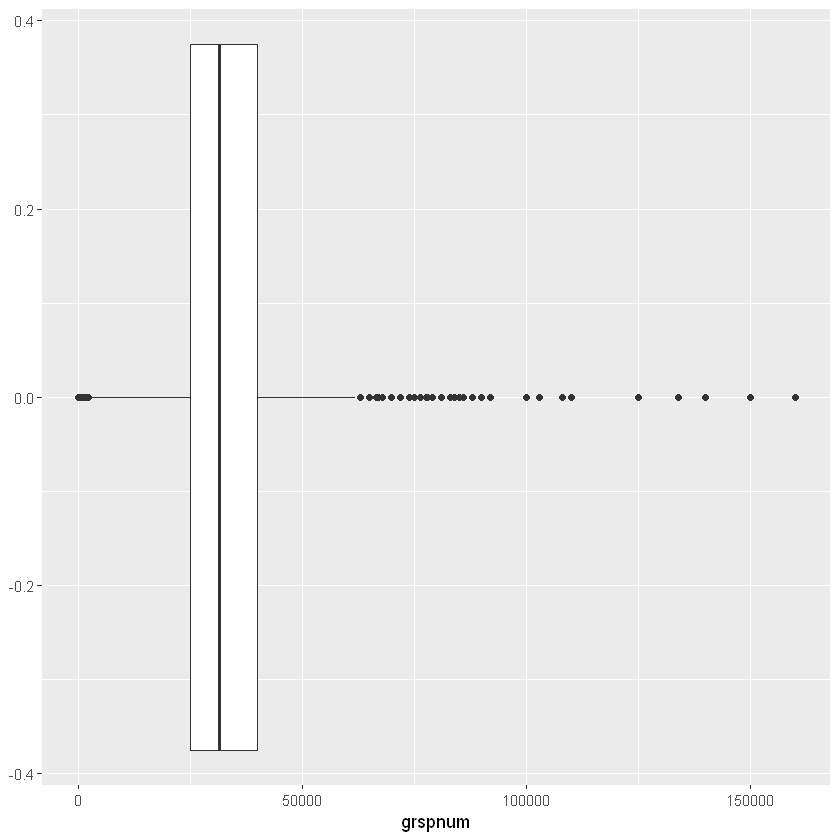

In [12]:
# boxplot of monthly income - only geom is changed

ggplot(data = ess18_filt, aes(x = grspnum)) + 
    geom_boxplot()

### Inspecting a linear correlation

Combining a scatterplot with a smoothed conditional means plot allows for a quick visualization of a possible linear correlation.

The `geom_smooth` geom accepts the argument `method = "lm"`. This fits a linear regression line on the data:

`geom_smooth()` using formula 'y ~ x'



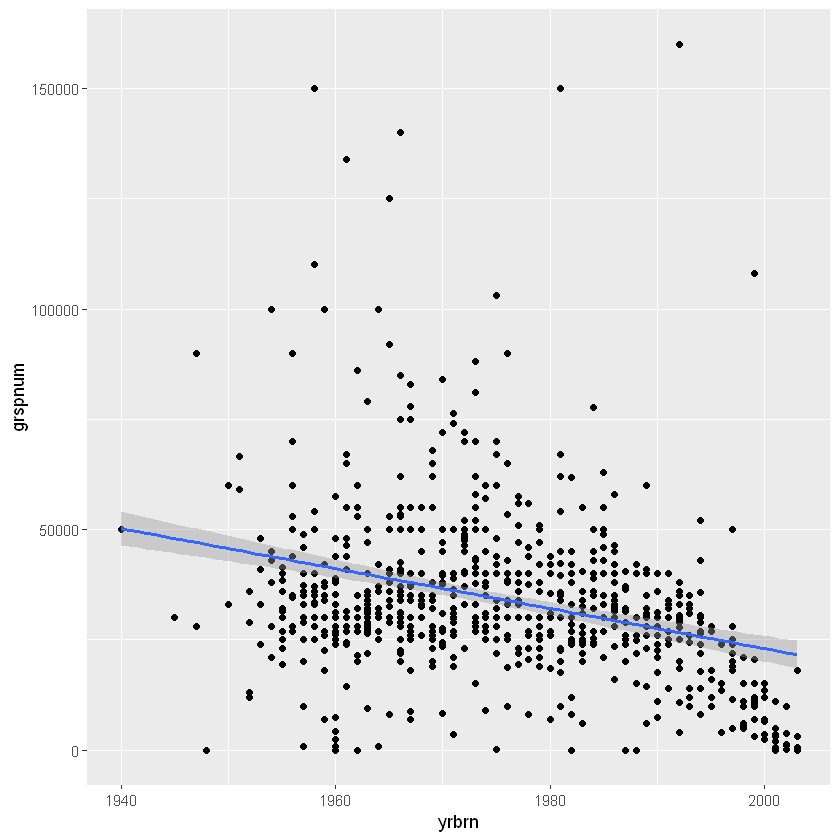

In [14]:
ggplot(data = ess18_filt, aes(x = yrbrn, y = grspnum)) + 
    geom_point() + 
    geom_smooth(method = "lm")

By default the line is fitted with a 95% confidence interval for the line coloured in. This can be disabled with the `se` argument. The confidence level can be changed with the `level` argument.